<div style="border: 10px solid orange; border-radius: 30px; position: relative; width: 100%; height: 300px; display: flex; justify-content: center; align-items: center; background-color: orange;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSV2RI7E0OhrPGr8UlIOO-_mfcaDY2W8O16oQ&usqp=CAU" style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; z-index: 0; opacity: 1.0; border-radius: 37px" >
    <div style="border-radius: 10px; position: relative; z-index: 1; text-align: center; background-color: rgba(50, 50, 50, 0.5); color: pink; display: flex; flex-direction: column; align-items: center; text-align: center; justify-content: center; width: 100%; margin: 10%; padding: 5px ">
            <h1 style="text-align: center; width: 100%" ><b>Data Analytics - Iris Dataset<b></h1>
    </div>
</div>

# <h1 style="text-align: center; font-family: 'Roboto', sans-serif; color: #08e8de; background-color: #ec9706; padding: 30px; border-style: solid; border-radius: 10px;"> Imports & Load Data </h1>

In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

pd.options.mode.chained_assignment = None

In [66]:
import warnings
warnings.filterwarnings("ignore")

sns.set()

In [4]:
DATA_PATH = 'Iris.csv'
df = pd.read_csv(DATA_PATH)

In [17]:
df.head().style.background_gradient(cmap='Blues')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [43]:
df.describe().T[1:].style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
PetalWidthCm,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


In [22]:
agg_df = df.agg(["nunique", "unique", lambda x:x.isna().sum(), "dtypes"]).T
agg_df['unique'] = agg_df['unique'].apply(lambda x: x if len(x)<10 else x[:10])
agg_df.style.apply(lambda s: ['background-color: rgba(200, 160, 40, 0.5)' if i % 2 == 0 else 'background-color: rgba(70, 147, 182, 0.5)' for i in range(len(s))])

,nunique,unique,,dtypes
Id,150,[ 1 2 3 4 5 6 7 8 9 10],0,int64
SepalLengthCm,35,[5.1 4.9 4.7 4.6 5. 5.4 4.4 4.8 4.3 5.8],0,float64
SepalWidthCm,23,[3.5 3. 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4. ],0,float64
PetalLengthCm,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1. 1.9 4.7],0,float64
PetalWidthCm,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6],0,float64
Species,3,['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'],0,object


# <h1 style="text-align: center; font-family: 'Roboto', sans-serif; color: #08e8de; background-color: #ec9706; padding: 30px; border-style: solid; border-radius: 10px;"> EDA </h1>

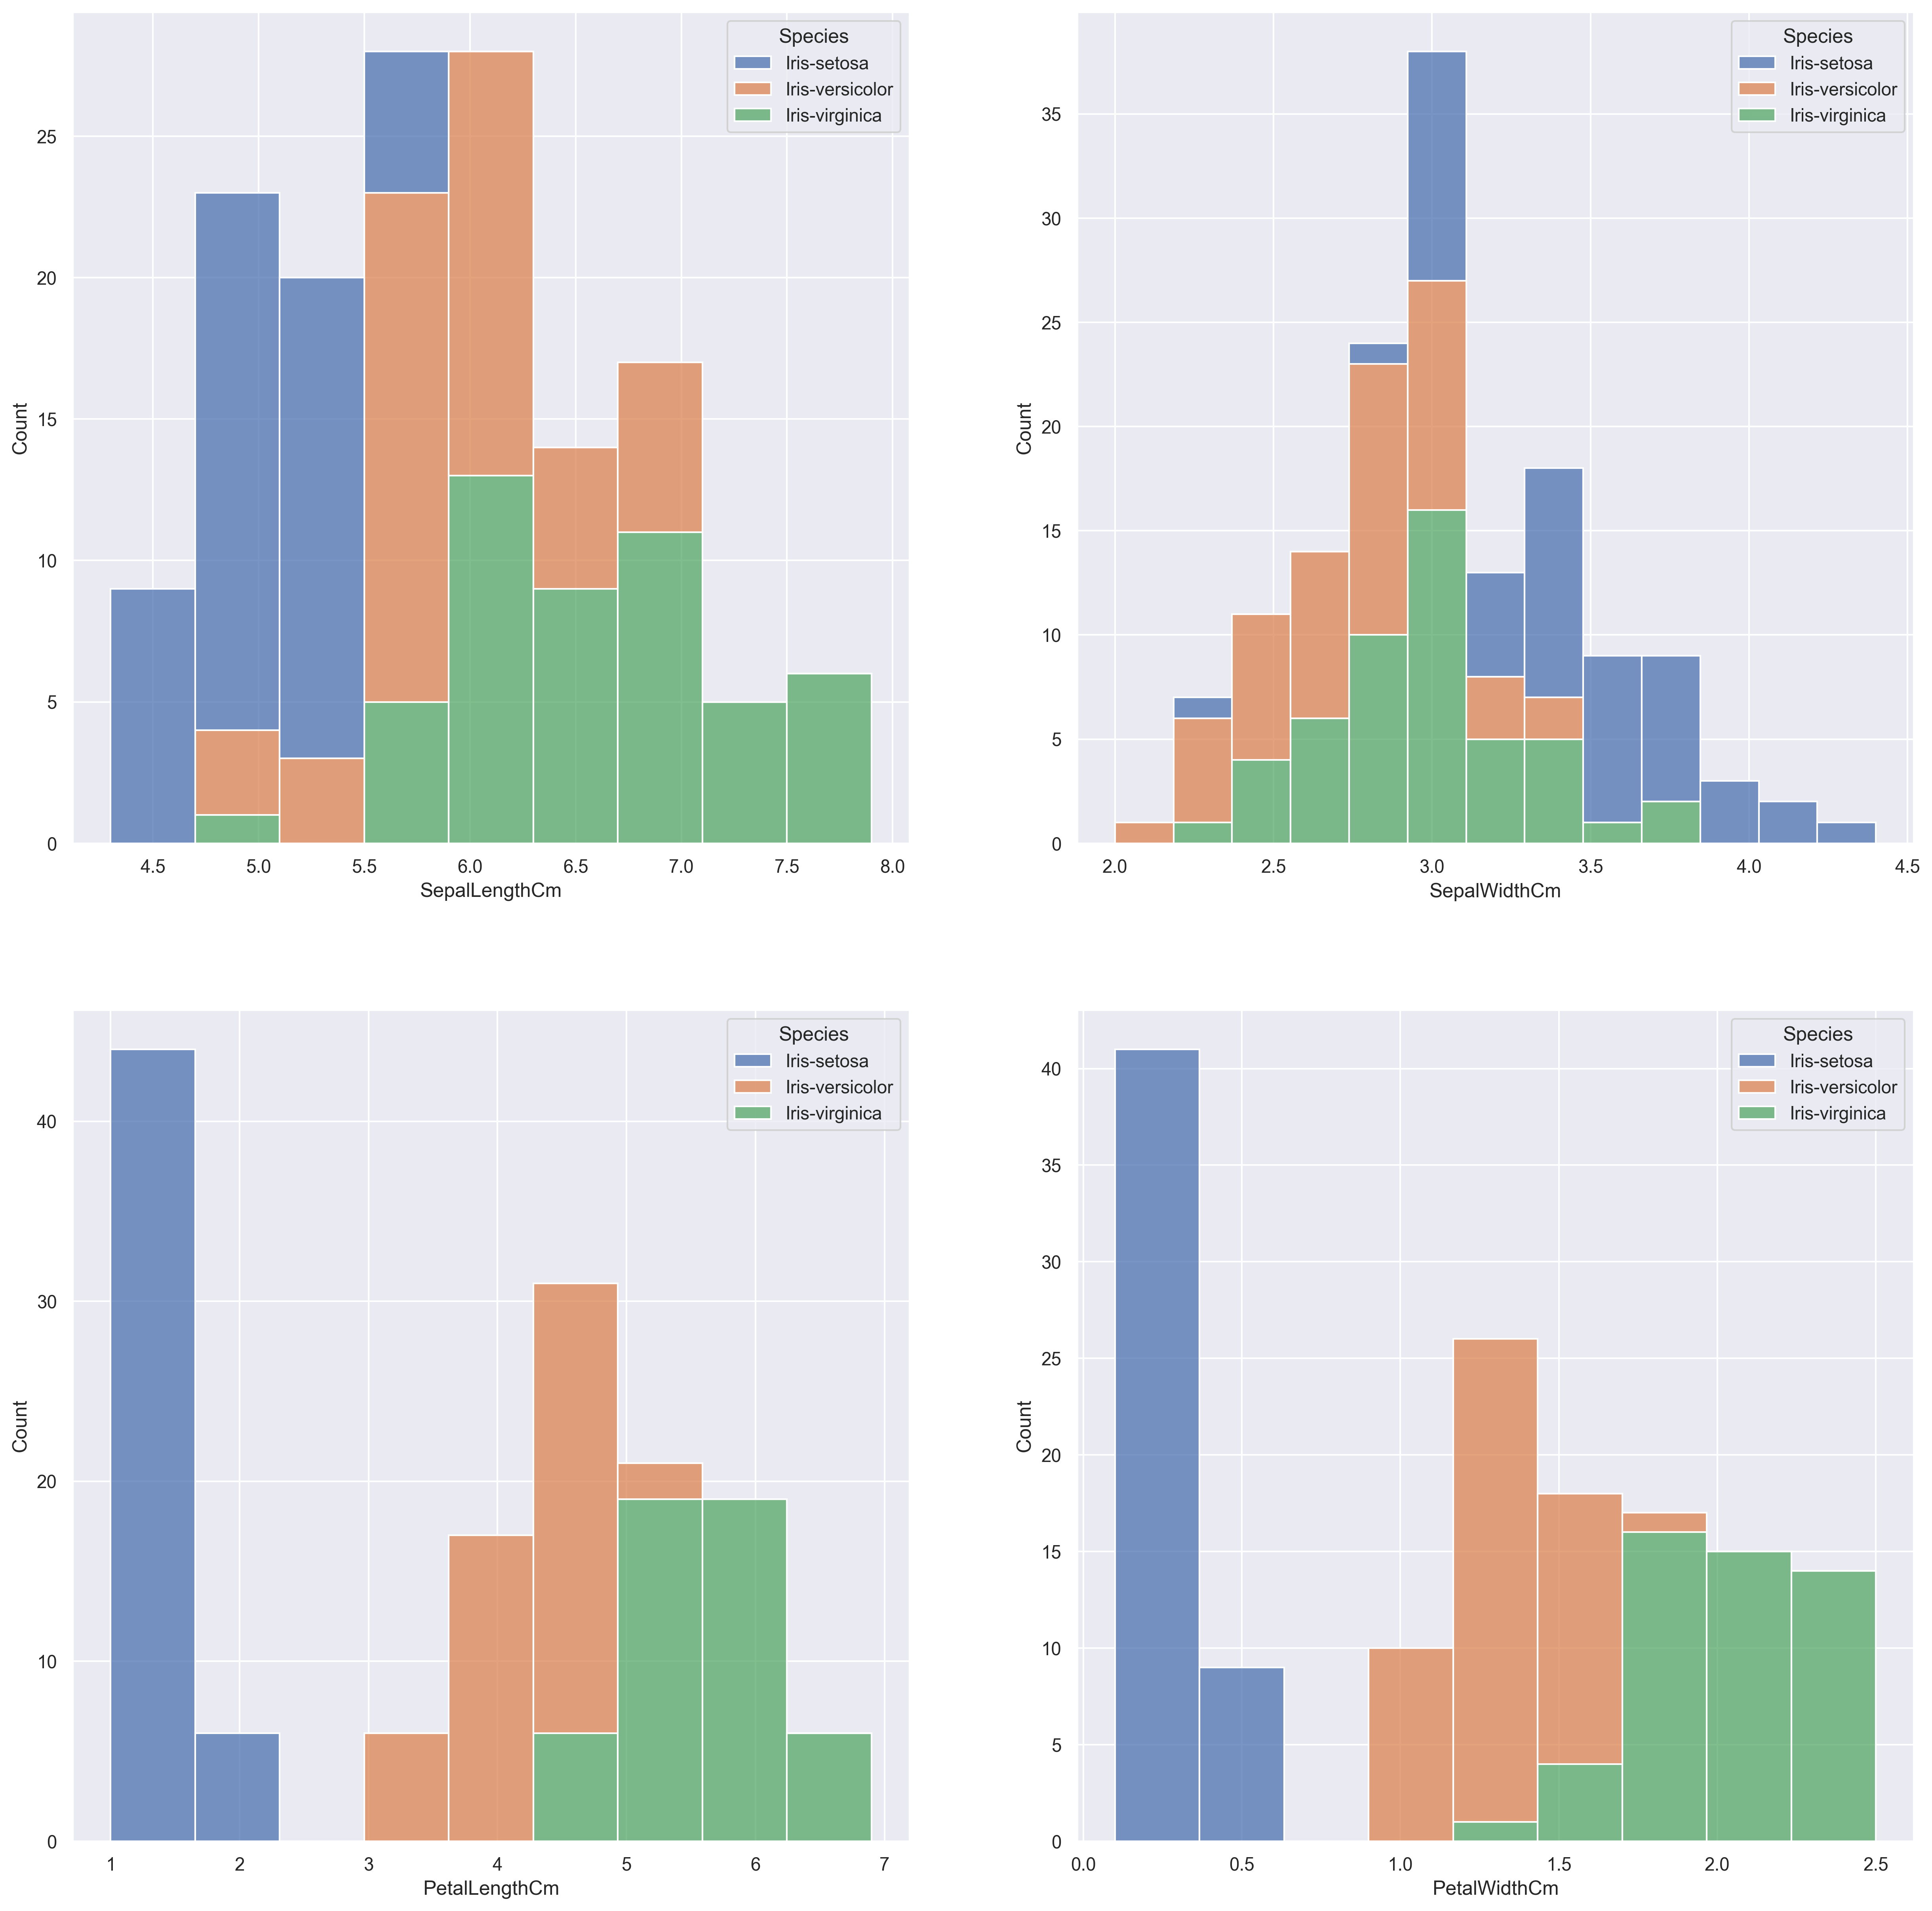

In [36]:
feat = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig,axes = plt.subplots(2, 2,figsize=(20, 20),dpi=300)
for i, col in enumerate(feat):
    sns.histplot(data=df, x=col, ax=axes.flatten()[i], hue="Species", multiple='stack')

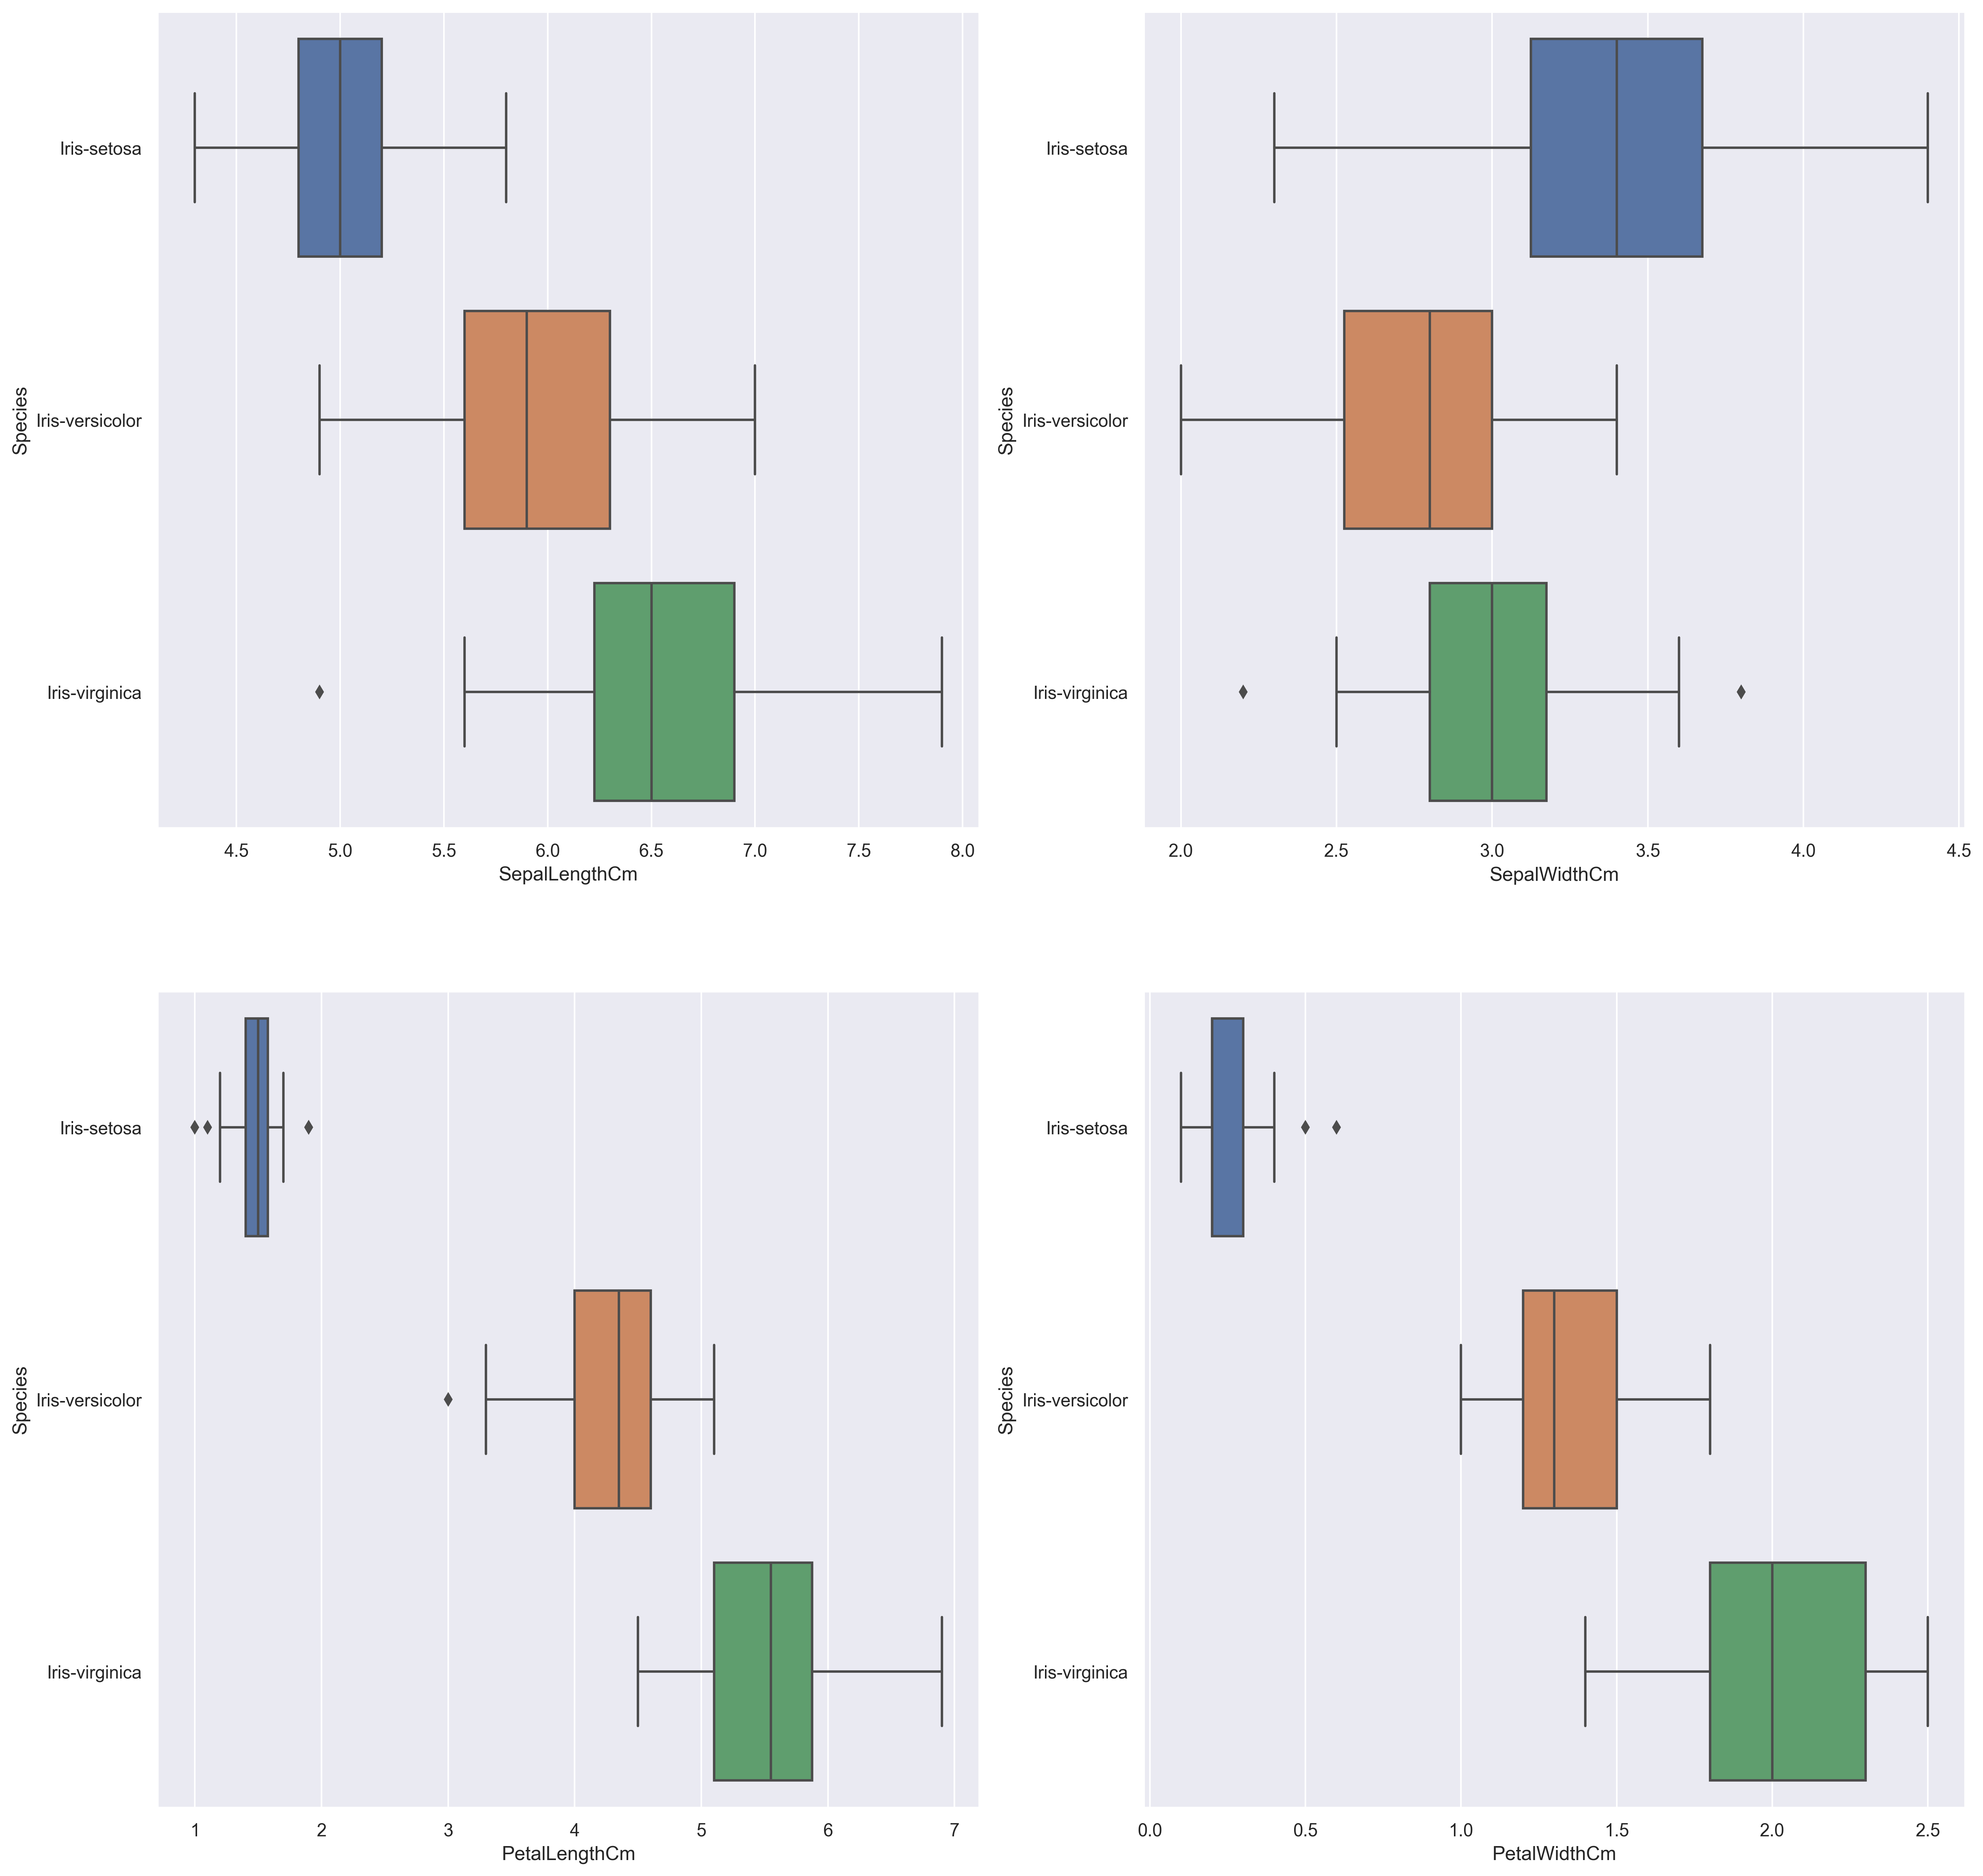

In [40]:
fig,axes = plt.subplots(2, 2,figsize=(20, 20),dpi=300)
for i, col in enumerate(feat):
    sns.boxplot(df, x=col, y="Species", ax=axes.flatten()[i])

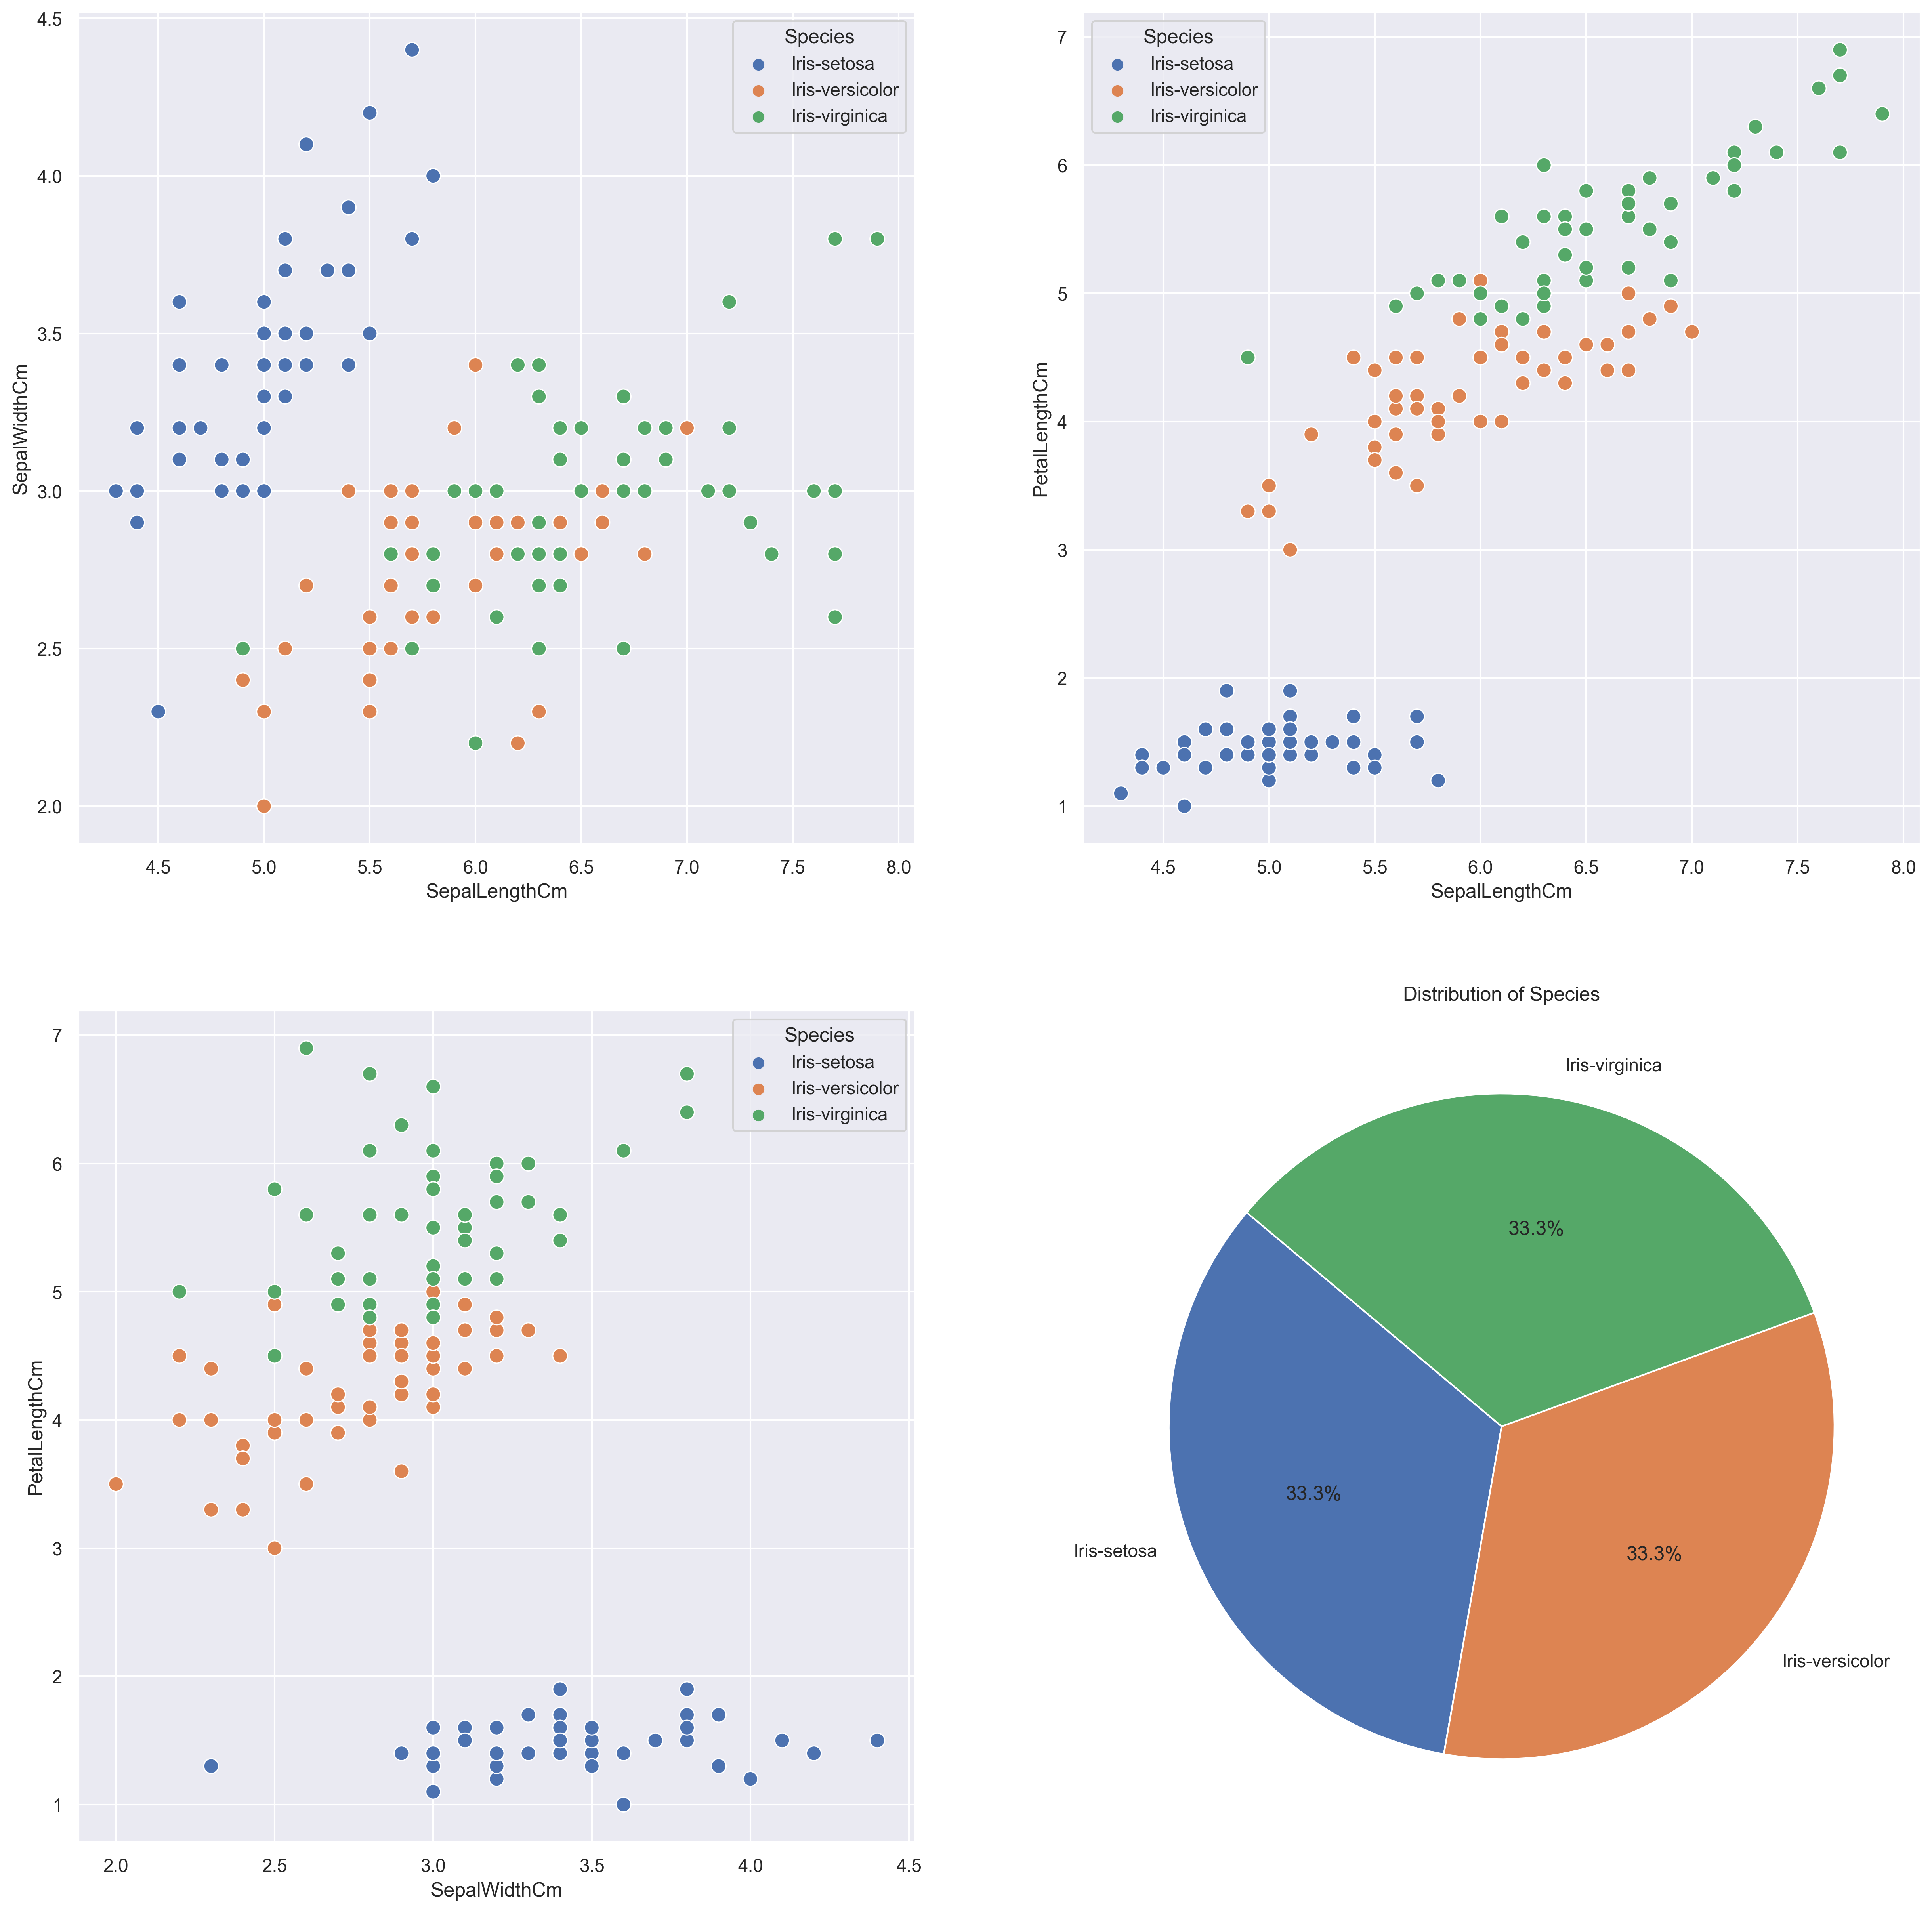

In [53]:
fig,axes = plt.subplots(2, 2,figsize=(20, 20),dpi=300)
sns.scatterplot(df, x=feat[0], y=feat[1], hue="Species", ax=axes[0, 0], s=80)
sns.scatterplot(df, x=feat[0], y=feat[2], hue="Species", ax=axes[0, 1], s=80)
sns.scatterplot(df, x=feat[1], y=feat[2], hue="Species", ax=axes[1, 0], s=80)
species_counts = df['Species'].value_counts()
axes[1, 1].pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Distribution of Species')
plt.show()

# <h1 style="text-align: center; font-family: 'Roboto', sans-serif; color: #08e8de; background-color: #ec9706; padding: 30px; border-style: solid; border-radius: 10px;"> Naive Bayes Classifier </h1>

In [54]:
from sklearn.model_selection import train_test_split
X = df[feat].values
Y = df["Species"].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=69)

In [55]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

def classification_metrics(y, y_hat):
    print(f"Accuracy Score : {accuracy_score(y, y_hat)}")
    try:
      print(f"AUC-ROC Score: {roc_auc_score(y, y_hat)}")
    except Exception:
      print("Unable to calculate AUC-ROC")
    print('-'*20)
    print(classification_report(y, y_hat))
    cm = confusion_matrix(y, y_hat)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy Score : 0.9333333333333333
Unable to calculate AUC-ROC
--------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.75      1.00      0.86         3
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.93        15
      macro avg       0.92      0.94      0.92        15
   weighted avg       0.95      0.93      0.94        15



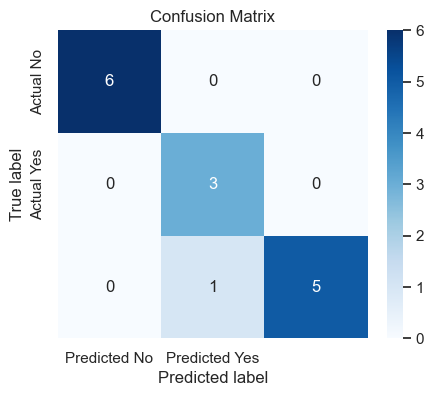

In [67]:
yhat = nb_classifier.predict(x_test)
classification_metrics(y_test, yhat)